In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
#import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#Classification Algorithms 
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("pm2.5改.csv",header='infer')
data.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
print(data.isnull()) #資料全筆數

        year  month    day   hour  pm2.5   DEWP   TEMP   PRES   cbwd    Iws  \
0      False  False  False  False   True  False  False  False  False  False   
1      False  False  False  False   True  False  False  False  False  False   
2      False  False  False  False   True  False  False  False  False  False   
3      False  False  False  False   True  False  False  False  False  False   
4      False  False  False  False   True  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
43819  False  False  False  False  False  False  False  False  False  False   
43820  False  False  False  False  False  False  False  False  False  False   
43821  False  False  False  False  False  False  False  False  False  False   
43822  False  False  False  False  False  False  False  False  False  False   
43823  False  False  False  False  False  False  False  False  False  False   

          Is     Ir  
0      False  False  
1      

In [ ]:
data.isnull().sum()#確認有無缺失值

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [ ]:
data=data.dropna() #刪去有NA的資料

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    41757 non-null  int64  
 1   month   41757 non-null  int64  
 2   day     41757 non-null  int64  
 3   hour    41757 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    41757 non-null  int64  
 6   TEMP    41757 non-null  float64
 7   PRES    41757 non-null  float64
 8   cbwd    41757 non-null  object 
 9   Iws     41757 non-null  float64
 10  Is      41757 non-null  int64  
 11  Ir      41757 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.1+ MB


In [ ]:
data.value_counts()#確認使用清洗後數據

year  month  day  hour  pm2.5  DEWP  TEMP   PRES    cbwd  Iws     Is  Ir
2010  1      2    0     129.0  -16   -4.0   1020.0  SE    1.79    0   0     1
2013  5      25   10    43.0    9     27.0  1012.0  cv    1.78    0   0     1
             24   16    146.0   15    23.0  1013.0  SE    7.15    0   0     1
                  17    76.0    16    22.0  1012.0  SE    8.94    0   0     1
                  18    56.0    15    23.0  1012.0  cv    0.89    0   0     1
                                                                           ..
2011  9      25   14    277.0   16    25.0  1016.0  SE    8.05    0   0     1
                  15    260.0   15    25.0  1015.0  SE    11.18   0   0     1
                  16    256.0   15    26.0  1015.0  SE    14.31   0   0     1
                  17    256.0   16    24.0  1015.0  SE    16.10   0   0     1
2014  12     31   23    12.0   -21   -3.0   1034.0  NW    249.85  0   0     1
Length: 41757, dtype: int64

In [ ]:
# Convert the columns into categorical variables
data1 = data.copy()
data1['cbwd'] = data1['cbwd'].astype('category').cat.codes

In [ ]:
data1.dtypes

year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd        int8
Iws      float64
Is         int64
Ir         int64
dtype: object

In [ ]:
print(data1.shape)

(41757, 12)


In [ ]:
y = data1['pm2.5']
x=data1.drop(['pm2.5'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (33405, 11) (33405,)
Test data shape (8352, 11) (8352,)


Feature: 0, Score: 396.81041
Feature: 1, Score: 1809.44476
Feature: 2, Score: 3794.66232
Feature: 3, Score: 2694.21075
Feature: 4, Score: 7686.33527
Feature: 5, Score: 8192.05148
Feature: 6, Score: 4831.71017
Feature: 7, Score: 14.11700
Feature: 8, Score: 3251.03529
Feature: 9, Score: 31.69451
Feature: 10, Score: 88.03916


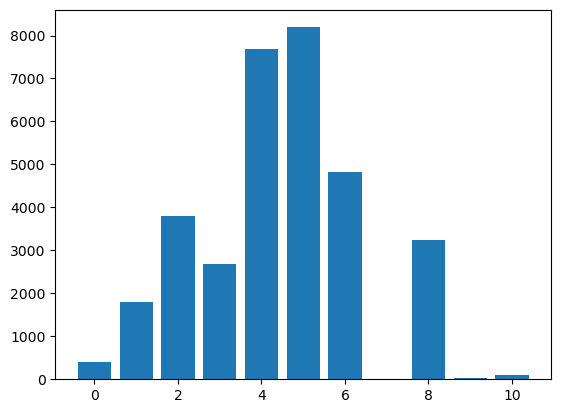

In [ ]:
from sklearn.inspection import permutation_importance
knn = KNeighborsRegressor(n_neighbors=5)
# fit the model
knn.fit(x_train,y_train)
# perform permutation importance
results = permutation_importance(knn, x, y, scoring='neg_mean_squared_error')
# get importance
importances = results.importances_mean
feature_names = data.drop('pm2.5', axis=1).columns
indices = np.argsort(importances)

# summarize feature importance
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()




In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
test_y_predicted =knn.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_test,test_y_predicted))

MAE 33.721623563218394


In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(y_test,test_y_predicted)))

RMSE 52.71748716569421


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,test_y_predicted))

MAPE 0.7039716464748852


In [ ]:
print("訓練集Score: ",knn.score(x_train, y_train))
print("測試集Score: ",knn.score(x_test, y_test))

訓練集Score:  0.8239565725747736
測試集Score:  0.6846020860468369


In [ ]:
data3=data.drop(columns=['Ir',"Is","cbwd",'hour',"year",'month'])#留下前五名

In [ ]:
data3.value_counts()#確認資料

day  pm2.5  DEWP  TEMP   PRES    Iws  
11   21.0    6     10.0  1023.0  0.89     2
15   47.0    12    14.0  1019.0  0.89     2
22   54.0    16    18.0  1011.0  0.89     2
9    197.0   11    15.0  1009.0  1.79     2
12   38.0    16    28.0  1006.0  3.13     2
                                         ..
11   13.0    4     30.0  997.0   4.92     1
             12    29.0  1010.0  9.84     1
             13    27.0  1012.0  1.79     1
                   35.0  999.0   3.13     1
31   469.0  -7    -1.0   1021.0  41.58    1
Length: 41727, dtype: int64

In [ ]:
data3.dtypes

day        int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
Iws      float64
dtype: object

In [ ]:
print(data3.shape)

(41757, 6)


In [ ]:
y2= data3['pm2.5']
x2=data3.drop(['pm2.5'], axis=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.20,random_state=42)

In [ ]:
print('Train data shape {} {}'.format(x2_train.shape, y2_train.shape))
print('Test data shape {} {}'.format(x2_test.shape, y2_test.shape))

Train data shape (33405, 5) (33405,)
Test data shape (8352, 5) (8352,)


In [ ]:
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(x2_train,y2_train)

KNeighborsRegressor()

In [ ]:
y2_train.pred=knn2.predict(x2_train)
y2_test_pred=knn2.predict(x2_test)

In [ ]:
from math import sqrt
print("Score: ",knn2.score(x2_train, y2_train))
print("Score: ",knn2.score(x2_test, y2_test))
print("MAE: ",mean_absolute_error(y2_test,y2_test_pred))
print("RMSE: ",sqrt(mean_squared_error(y2_test,y2_test_pred)))
print('MAPE',mean_absolute_percentage_error(y2_test,y2_test_pred))

Score:  0.73525906514858
Score:  0.5618201839027839
MAE:  40.41307471264367
RMSE:  62.13717105581749
MAPE 0.9092778879758923
